In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score
import seaborn as sns
import pickle

In [2]:
df_test = pd.read_pickle("Data_Wrangling_test.pkl")

In [2]:
df = pd.read_pickle("Data_visualization.pkl")

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401589 entries, 0 to 390926
Data columns (total 23 columns):
channelGrouping          401589 non-null object
date                     401589 non-null object
fullVisitorId            401589 non-null object
visitId                  401589 non-null int64
visitNumber              401589 non-null int64
visitStartTime           401589 non-null datetime64[ns]
browser                  401589 non-null object
deviceCategory           401589 non-null object
OS                       401589 non-null object
subContinent             401589 non-null object
hits                     401589 non-null int64
pageviews                401589 non-null float64
sessionQualityDim        401589 non-null int64
timeonsite               401589 non-null object
Revenue_Original         401589 non-null int64
source                   401589 non-null object
transactionRevenueLog    401589 non-null float64
Revenue_label            401589 non-null int64
month_year           

In [3]:
def revenuelabel(x):
    if x == 0:
        x = 0
        return x
    else:
        x = 1
        return x

In [4]:
def revenue_fun(x):
    x = int(x)
    if x !=0:
        return np.log(x)
    else:
        x = 0
        return x

In [16]:
def numerical_data(df):
    df['sessionQualityDim'] = df['sessionQualityDim'].apply(lambda x: int(x))
    df['timeonsite'] = df['timeonsite'].apply(lambda x: int(x))
    df_cum = df.groupby(['fullVisitorId'])['visitNumber','hits','pageviews','timeonsite','Revenue_Original'].sum()
    
    df_mean = df.groupby(['fullVisitorId'])['sessionQualityDim'].mean()
    numerical = df_cum.join(df_mean)
    
    numerical['Revenue_label'] = numerical['Revenue_Original'].apply(lambda x: revenuelabel(x))
    numerical['transactionRevenueLog'] = numerical['Revenue_Original'].apply(lambda x: revenue_fun(x))
    numerical["number_visits"] = df.groupby(['fullVisitorId']).size()
    numerical['freq_label'] = np.where((numerical['number_visits'] >1),1,0)
    return numerical

In [17]:
numerical = numerical_data(df_test)

In [18]:
numerical.head()

,visitNumber,hits,pageviews,timeonsite,Revenue_Original,sessionQualityDim,Revenue_label,transactionRevenueLog,number_visits,freq_label
fullVisitorId,,,,,,,,,,
0000018966949534117,1,7,7.0,131,0,1.0,0,0.0,1,0
0000039738481224681,1,1,1.0,1,0,1.0,0,0.0,1,0
0000073585230191399,1,1,1.0,1,0,1.0,0,0.0,1,0
0000087588448856385,1,1,1.0,1,0,1.0,0,0.0,1,0
0000149787903119437,1,1,1.0,1,0,1.0,0,0.0,1,0


In [19]:
len(numerical[(numerical['number_visits'] >1) \
              & (numerical['Revenue_Original'] ==0)])/len(numerical[(numerical['Revenue_Original'] ==0)])*100

17.15987057672707

In [20]:
len(numerical)/len(df_test)*100

73.83917388175473

Frequent User vs Transcation

In [72]:
ex = numerical[numerical['transactionRevenueLog'] > 0]

/Users/JasonLi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


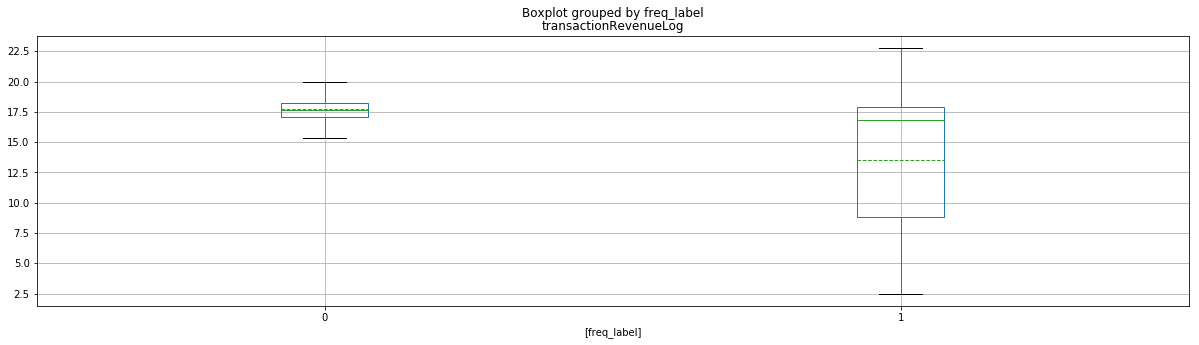

In [76]:
fig, ax = plt.subplots(figsize=(20, 5))

a1=ex[['transactionRevenueLog','freq_label']]
a1['transactionRevenueLog'] = a1['transactionRevenueLog']/ex['visit_per_month']
a1.boxplot(by='freq_label', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, ax = ax)

In [25]:
#numerical.to_pickle('Data_numerical.pkl')

In [26]:
numerical.to_pickle('Data_numerical_test.pkl')

In [83]:
numerical = pd.read_pickle('Data_numerical_test.pkl')

## Categorical

In [27]:
cat_df = df_test[['fullVisitorId','channelGrouping','browser','deviceCategory','OS','subContinent'
             ,'source','month_year','timeofday','hourofday','timeofweek','day']]#.set_index('fullVisitorId')

In [28]:
index_freq = numerical[numerical['number_visits'] >1].index

In [29]:
freq = cat_df.loc[cat_df['fullVisitorId'].isin(index_freq)]

In [30]:
len(freq)/len(df_test)

0.39373837430806125

In [31]:
%%time
channelGrouping = freq.groupby(['fullVisitorId'])['channelGrouping'].apply(set)#.apply(lambda x: list(x))
browser = freq.groupby(['fullVisitorId'])['browser'].apply(set)#.apply(lambda x: list(x))

CPU times: user 8.2 s, sys: 25.8 ms, total: 8.23 s
Wall time: 8.14 s


In [32]:
deviceCategory = freq.groupby(['fullVisitorId'])['deviceCategory'].apply(set)#.apply(lambda x: list(x))
OS = freq.groupby(['fullVisitorId'])['OS'].apply(set)#.apply(lambda x: list(x))

In [33]:
subContinent = freq.groupby(['fullVisitorId'])['subContinent'].apply(set)#.apply(lambda x: list(x))
source = freq.groupby(['fullVisitorId'])['source'].apply(set)#.apply(lambda x: list(x))

In [34]:
month_year = freq.groupby(['fullVisitorId'])['month_year'].apply(set)#.apply(lambda x: list(x))
timeofday = freq.groupby(['fullVisitorId'])['timeofday'].apply(set)#.apply(lambda x: list(x))
hourofday = freq.groupby(['fullVisitorId'])['hourofday'].apply(set)#.apply(lambda x: list(x))
timeofweek = freq.groupby(['fullVisitorId'])['timeofweek'].apply(set)#.apply(lambda x: list(x))
day = freq.groupby(['fullVisitorId'])['day'].apply(set)#.apply(lambda x: list(x))

In [35]:
freq_2 = pd.concat([channelGrouping,browser,deviceCategory,OS,subContinent,source,month_year,\
                    timeofday, hourofday,timeofweek,day], axis=1)

In [36]:
def clean_brower(list1):
    return ['Chrome' if "Chrome" in x else 'Safari' if "Safari" in x else "Firefox" \
            if "Firefox" in x else "Other Browser" for x in list1]

In [37]:
def clean_source(list1):
    return ['from google' if "google" in x else 'direct traffic' if "direct" in x else "from youtube" \
            if "youtube" in x else "Other Source" for x in list1]

In [38]:
def clean_OS(list1):
    return ['Windows' if 'Windows' in x else 'Macintosh' if 'Macintosh' in x else "Chrome OS" \
            if "Chrome" in x else "Linux" if "Linus" in x else "Other_OS" for x in list1]

In [39]:
freq_2['browser'] = freq_2['browser'].apply(lambda x: clean_brower(x))

In [40]:
freq_2['source'] = freq_2['source'].apply(lambda x: clean_source(x))

In [41]:
freq_2['OS'] = freq_2['OS'].apply(lambda x: clean_OS(x))

In [42]:
freq_2 = freq_2.drop(['month_year','hourofday','day'],axis =1)

None Frequent Data

In [43]:
Nonefreq = cat_df.loc[~cat_df['fullVisitorId'].isin(index_freq)]
Nonefreq = Nonefreq.set_index('fullVisitorId')

In [44]:
def clean_brower2(x):
    return ['Chrome' if "Chrome" in x else 'Safari' if "Safari" in x else "Firefox" \
            if "Firefox" in x else "Other Browser"]

In [45]:
def clean_source2(x):
    return ['from google' if "google" in x else 'direct traffic' if "direct" in x else "from youtube" \
            if "youtube" in x else "Other Source"]

In [46]:
def clean_OS2(x):
    return ['Windows' if 'Windows' in x else 'Macintosh' if 'Macintosh' in x else "Chrome OS" \
            if "Chrome" in x else "Linux" if "Linus" in x else "Other_OS"]

In [47]:
def clean_cat(x):
    return [x]

In [48]:
Nonefreq['browser'] = Nonefreq['browser'].apply(lambda x: clean_brower2(x))

In [49]:
Nonefreq['source'] = Nonefreq['source'].apply(lambda x: clean_source2(x))

In [50]:
Nonefreq['OS'] = Nonefreq['OS'].apply(lambda x: clean_OS2(x))

In [51]:
Nonefreq = Nonefreq.drop(['month_year','hourofday','day'],axis =1)

In [52]:
Nonefreq

,channelGrouping,browser,deviceCategory,OS,subContinent,source,timeofday,timeofweek
fullVisitorId,,,,,,,,
8381672768065729990,Organic Search,[Other Browser],tablet,[Windows],Northern America,[from google],Even,Friday
0459669224143241747,Affiliates,[Safari],tablet,[Other_OS],Eastern Asia,[Other Source],Even,Friday
589440789980446309,Direct,[Other Browser],desktop,[Windows],Southern Europe,[direct traffic],Even,Friday
5299820794845174508,Referral,[Chrome],desktop,[Other_OS],Northern America,[direct traffic],Morn,Saturday
7414906446453226824,Referral,[Chrome],desktop,[Chrome OS],Northern America,[direct traffic],Even,Friday
4063440620410560213,Direct,[Chrome],desktop,[Windows],Northern America,[direct traffic],Even,Friday
3326540121689239742,Referral,[Chrome],desktop,[Other_OS],Northern America,[direct traffic],Even,Friday
7713658643915819491,Organic Search,[Safari],desktop,[Macintosh],Western Asia,[from google],Morn,Friday
7437323504893211921,Referral,[Chrome],desktop,[Macintosh],Eastern Asia,[Other Source],Morn,Saturday


In [53]:
Nonefreq['channelGrouping'] = Nonefreq['channelGrouping'].apply(lambda x: [x])
Nonefreq['subContinent'] = Nonefreq['subContinent'].apply(lambda x: [x])
Nonefreq['timeofday'] = Nonefreq['timeofday'].apply(lambda x: [x])
Nonefreq['timeofweek'] = Nonefreq['timeofweek'].apply(lambda x: [x])
Nonefreq['deviceCategory'] = Nonefreq['deviceCategory'].apply(lambda x: [x])

Encoding

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer

In [55]:
def encoding(df):
    temp_index = df.reset_index()['fullVisitorId'].to_frame()
    one_hot = MultiLabelBinarizer()
    for columns in df:
        if df[columns].dtype == 'O':
            temp = one_hot.fit_transform(df[columns])
            temp_label = one_hot.classes_
            temp_df = pd.DataFrame(data= temp, columns = temp_label)
            temp_index = temp_index.join(temp_df)
    return temp_index.set_index('fullVisitorId')

In [56]:
o = encoding(freq_2)

In [57]:
o2 = encoding(Nonefreq)

In [99]:
train = pd.concat([o, o2])

/Users/JasonLi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [59]:
def clean_time(list1):
    return len(list1)

In [95]:
numerical['visit_per_month'] = month_year.apply(lambda x: clean_time(x))

In [96]:
numerical['visit_per_hour'] = hourofday.apply(lambda x: clean_time(x))

In [62]:
freq_2.head()

,channelGrouping,browser,deviceCategory,OS,subContinent,source,timeofday,timeofweek
fullVisitorId,,,,,,,,
0000450284137157873,"{Direct, Referral, Organic Search}",[Chrome],{desktop},[Macintosh],{Eastern Asia},"[Other Source, direct traffic, from google]","{Morn, Even}","{Sunday, Tuesday, Saturday, Friday}"
0000507436339585432,{Display},[Chrome],{mobile},[Other_OS],{Northern America},[Other Source],{Morn},{Tuesday}
0000528281082051132,{Organic Search},[Chrome],{desktop},[Windows],{South America},[from google],"{Morn, Even}",{Thursday}
0000615377447828320,{Organic Search},[Safari],{tablet},[Other_OS],{Northern America},[from google],"{Morn, Even}",{Tuesday}
0000779540350222621,{Organic Search},[Chrome],{desktop},[Windows],{Northern Europe},[from google],"{Morn, Even}",{Monday}


In [63]:
numerical =numerical.fillna(1)

In [100]:
train = train.join(numerical)

In [101]:
train.to_pickle('Test.pkl')

In [86]:
numerical_copy = numerical.copy()

In [97]:
numerical[['visitNumber','hits','pageviews','timeonsite','Revenue_Original']] = numerical[['visitNumber','hits','pageviews','timeonsite','Revenue_Original']].div(numerical['visit_per_month'].values,axis=0)


In [93]:
numerical = numerical_copy